In [1]:
from google.colab import files
uploaded = files.upload()

Saving yg821jf8611_tn_nashville_2020_04_01.csv.zip to yg821jf8611_tn_nashville_2020_04_01.csv.zip


In [2]:
import pandas as pd
df= pd.read_csv('yg821jf8611_tn_nashville_2020_04_01.csv.zip')
print(df.shape)
print(df.info())
print(df.columns)


<ipython-input-2-e8b40b591d3a>:2: DtypeWarning: Columns (6,8,15,16,17,22,23,24,25,29,30,31,32,33,35,36,37,38,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('yg821jf8611_tn_nashville_2020_04_01.csv.zip')


(3092351, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092351 entries, 0 to 3092350
Data columns (total 42 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   raw_row_number                  object 
 1   date                            object 
 2   time                            object 
 3   location                        object 
 4   lat                             float64
 5   lng                             float64
 6   precinct                        object 
 7   reporting_area                  float64
 8   zone                            object 
 9   subject_age                     float64
 10  subject_race                    object 
 11  subject_sex                     object 
 12  officer_id_hash                 object 
 13  type                            object 
 14  violation                       object 
 15  arrest_made                     object 
 16  citation_issued                 object 
 17  warning_issue

In [3]:
df.head()

,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,subject_age,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
0,232947,2010-10-10,NaN,"DOMINICAN DR & ROSA L PARKS BLVD, NASHVILLE, T...",36.187925,-86.798519,6.0,4403.0,611.0,27.0,...,False,NaN,N,False,False,False,False,False,False,False
1,237161,2010-10-10,10:00:00,"1122 LEBANON PIKE, NASHVILLE, TN, 37210",36.155521,-86.735902,5.0,9035.0,513.0,18.0,...,True,NaN,N,False,False,False,False,False,False,False
2,232902,2010-10-10,10:00:00,"898 DAVIDSON DR, , TN, 37205",36.117420,-86.895593,1.0,5005.0,121.0,52.0,...,False,NaN,N,False,False,False,False,False,False,False
3,233219,2010-10-10,22:00:00,"MURFREESBORO PIKE & NASHBORO BLVD, ANTIOCH, TN...",36.086799,-86.648581,3.0,8891.0,325.0,25.0,...,False,NaN,N,False,False,False,False,False,False,False
4,232780,2010-10-10,01:00:00,"BUCHANAN ST, NORTH, TN, 37208",36.180038,-86.809109,NaN,NaN,NaN,21.0,...,False,NaN,N,True,True,False,False,False,False,False


#Data cleaning

In [4]:
# Remove redundant columns
redundant_columns = [
    'raw_verbal_warning_issued', 'raw_written_warning_issued',
    'raw_traffic_citation_issued', 'raw_misd_state_citation_issued',
    'raw_suspect_ethnicity', 'raw_driver_searched', 'raw_passenger_searched',
    'raw_search_consent', 'raw_search_arrest', 'raw_search_warrant',
    'raw_search_inventory', 'raw_search_plain_view','raw_row_number'
]

df1 = df.drop(columns=redundant_columns)

In [5]:
df1.shape

(3092351, 29)

In [6]:
# Convert 'nan' to False for specific columns
boolean_columns = [
    'contraband_found', 'contraband_drugs', 'contraband_weapons',
    'frisk_performed', 'search_conducted', 'search_person', 'search_vehicle',
    'arrest_made', 'citation_issued', 'warning_issued'
]

for col in boolean_columns:
    df1[col] = df1[col].fillna(False)

In [7]:
# Remove columns that have the same value for all rows
constant_columns = [col for col in df.columns if df[col].nunique() <= 1]
df1 = df1.drop(columns=constant_columns)
df1.shape

(3092351, 28)

In [8]:
constant_columns

['type']

In [9]:
df["type"].value_counts()

,count
type,
vehicular,3092351


In [10]:
df1.isnull().sum()

,0
date,0
time,5467
location,0
lat,187106
lng,187106
precinct,390222
reporting_area,332393
zone,390222
subject_age,839
subject_race,1850


In [11]:
for c in df1.columns[df1.dtypes == 'object'].tolist():
    if df1[c].nunique() > 20:
        print(f'{c} MORE THAN 20 UNIQUE VALUES: {df1[c].nunique()}')
    else:
        print(c, df1[c].unique())

date MORE THAN 20 UNIQUE VALUES: 3370
time MORE THAN 20 UNIQUE VALUES: 1439
location MORE THAN 20 UNIQUE VALUES: 100198
precinct [6.0 5.0 1.0 3.0 nan 7.0 8.0 2.0 4.0 '6' '1' '5' '2' '7' '8' '4' '3' 'U']
zone MORE THAN 20 UNIQUE VALUES: 154
subject_race ['black' 'white' 'hispanic' 'asian/pacific islander' 'other' 'unknown' nan]
subject_sex ['male' 'female' nan]
officer_id_hash MORE THAN 20 UNIQUE VALUES: 2294
violation ['investigative stop' 'moving traffic violation'
 'vehicle equipment violation' 'registration' 'seatbelt violation'
 'safety violation' nan 'parking violation' 'child restraint']
outcome ['warning' 'citation' 'arrest' nan]
search_basis [nan 'probable cause' 'plain view' 'consent' 'other']
reason_for_stop ['investigative stop' 'moving traffic violation'
 'vehicle equipment violation' 'registration' 'seatbelt violation'
 'safety violation' nan 'parking violation' 'child restraint']
vehicle_registration_state MORE THAN 20 UNIQUE VALUES: 51
notes MORE THAN 20 UNIQUE VALUES: 1

notes is free-form strings and the most variable, so we'll drop that column. officer_id_hash is the next most variable since it corresponds to different officers. For now we will also drop that column, though it could be interesting to try to use an efficient encoding to see any potential correlation with specific officers. Finally, location is a somewhat free-form address representation. The format is inconsistent, so we'll leave it out and note that we do have some other location information (lat, lng, precinct, etc.).

In [12]:
# Drop `drop_cols` and print unique values from remaining 'object' column types.
drop_cols = ['notes', 'officer_id_hash', 'location','zone', 'precinct']
df1.drop(drop_cols, axis=1, inplace=True)

for c in df1.columns[df1.dtypes == 'object'].tolist():
    print(c, df1[c].unique())

date ['2010-10-10' '2011-10-10' '2012-10-10' ... '2014-09-09' '2015-09-09'
 '2016-09-09']
time [nan '10:00:00' '22:00:00' ... '05:06:00' '03:39:00' '06:39:00']
subject_race ['black' 'white' 'hispanic' 'asian/pacific islander' 'other' 'unknown' nan]
subject_sex ['male' 'female' nan]
violation ['investigative stop' 'moving traffic violation'
 'vehicle equipment violation' 'registration' 'seatbelt violation'
 'safety violation' nan 'parking violation' 'child restraint']
outcome ['warning' 'citation' 'arrest' nan]
search_basis [nan 'probable cause' 'plain view' 'consent' 'other']
reason_for_stop ['investigative stop' 'moving traffic violation'
 'vehicle equipment violation' 'registration' 'seatbelt violation'
 'safety violation' nan 'parking violation' 'child restraint']
vehicle_registration_state ['TN' 'AL' 'NC' 'LA' 'TX' 'IN' 'AR' nan 'MS' 'GA' 'MI' 'KY' 'FL' 'KS' 'IL'
 'WV' 'MO' 'SC' 'PA' 'ME' 'OK' 'OH' 'CT' 'ID' 'DE' 'CA' 'VA' 'NH' 'NJ'
 'MN' 'WI' 'WY' 'WA' 'IA' 'NY' 'HI' 'CO' 'NM' 'AZ

Out of the remaining object columns, we'll convert as follows:

date: Split out year, month, and day into separate columns to make it easier to see any correlations along these dimensions, as well as provide better features for later modeling. After creating the separate columns, drop the original date column.

time: Drop NaNs, keep the hour, convert to int.

subject_race,subject_sex,violation: Drop NaNs, categorical.

citation_issued, warning_issued, outcome: Drop. outcome is essentially covering the other two plus arrest_made as a categorical feature, and warning_issued/citation_issued are mutually exclusive with arrest_made.

search_basis: Fill NaNs with "unknown", categorical.

reason_for_stop: Drop NaNs, categorical.

vehicle_registration_state: Drop NaNs, categorical.

In [13]:
# Drop columns identified above.
drop_cols = ['citation_issued', 'warning_issued', 'outcome']
df1.drop(drop_cols, axis=1, inplace=True)

In [14]:
#date column

df1['year'] = df1.date.apply(lambda x: int(x[:4]))
df1['month'] = df1.date.apply(lambda x: int(x[5:7]))
df1['day'] = df1.date.apply(lambda x: int(x[8:10]))

df1.drop(['date'], axis=1, inplace=True)

In [16]:
#time Column

df1.dropna(subset=['time'], inplace=True)
df1['hour'] = df1.time.apply(lambda x: int(x[:2]))
df1.drop(['time'], axis=1, inplace=True)



search_basis Column
The search_basis column is sparse but may provide good signals. It has the same non-null count as the contraband_* fields originally had, so it likely has a value associated with the contraband outcome.

As this is a sparse categorical feature, we'll first fill Nulls with "unknown", then convert to one-hot encoding using Pandas get_dummies.

In [17]:
# Backfill Nulls with "unknown"
df1.search_basis.fillna("unknown", inplace=True)

# One-hot encode search_basis.
df1 = pd.get_dummies(df1, columns=['search_basis'])

Remaining Columns
The remaining columns are categorical and will follow the common method of:

Drop rows in NaN values for the column.
Convert the column into one-hot encoded.

Target columns: ['subject_race', 'subject_sex', 'violation', 'reason_for_stop', 'vehicle_registration_state']

In [18]:
# Drop NaN rows for the identified columns.
target_cols = ['subject_race', 'subject_sex', 'violation', 'reason_for_stop', 'vehicle_registration_state']
df1.dropna(subset=target_cols, inplace=True)

# One-hot encode the target columns.
df1 = pd.get_dummies(df1, columns=target_cols)


In [19]:
# Final dataset to start exploring and eventually train some models.
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 3033675 entries, 1 to 3092350
Data columns (total 96 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   lat                                          float64
 1   lng                                          float64
 2   reporting_area                               float64
 3   subject_age                                  float64
 4   arrest_made                                  bool   
 5   contraband_found                             bool   
 6   contraband_drugs                             bool   
 7   contraband_weapons                           bool   
 8   frisk_performed                              bool   
 9   search_conducted                             bool   
 10  search_person                                bool   
 11  search_vehicle                               bool   
 12  year                                         int64  
 13  month            

In [20]:
df1.isna().sum()

,0
lat,182731
lng,182731
reporting_area,328279
subject_age,494
arrest_made,0
...,...
vehicle_registration_state_VT,0
vehicle_registration_state_WA,0
vehicle_registration_state_WI,0
vehicle_registration_state_WV,0


In [21]:
df1.dropna(inplace=True)

In [23]:
df1.drop(columns=['reporting_area'],inplace= True)

In [24]:
df1.shape

(2609098, 95)

In [25]:
df1.isna().sum()

,0
lat,0
lng,0
subject_age,0
arrest_made,0
contraband_found,0
...,...
vehicle_registration_state_VT,0
vehicle_registration_state_WA,0
vehicle_registration_state_WI,0
vehicle_registration_state_WV,0


In [26]:
data=df1.copy()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2609098 entries, 1 to 3092349
Data columns (total 95 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   lat                                          float64
 1   lng                                          float64
 2   subject_age                                  float64
 3   arrest_made                                  bool   
 4   contraband_found                             bool   
 5   contraband_drugs                             bool   
 6   contraband_weapons                           bool   
 7   frisk_performed                              bool   
 8   search_conducted                             bool   
 9   search_person                                bool   
 10  search_vehicle                               bool   
 11  year                                         int64  
 12  month                                        int64  
 13  day              

##EXPLORATORY DATA ANALYSIS

<Axes: >

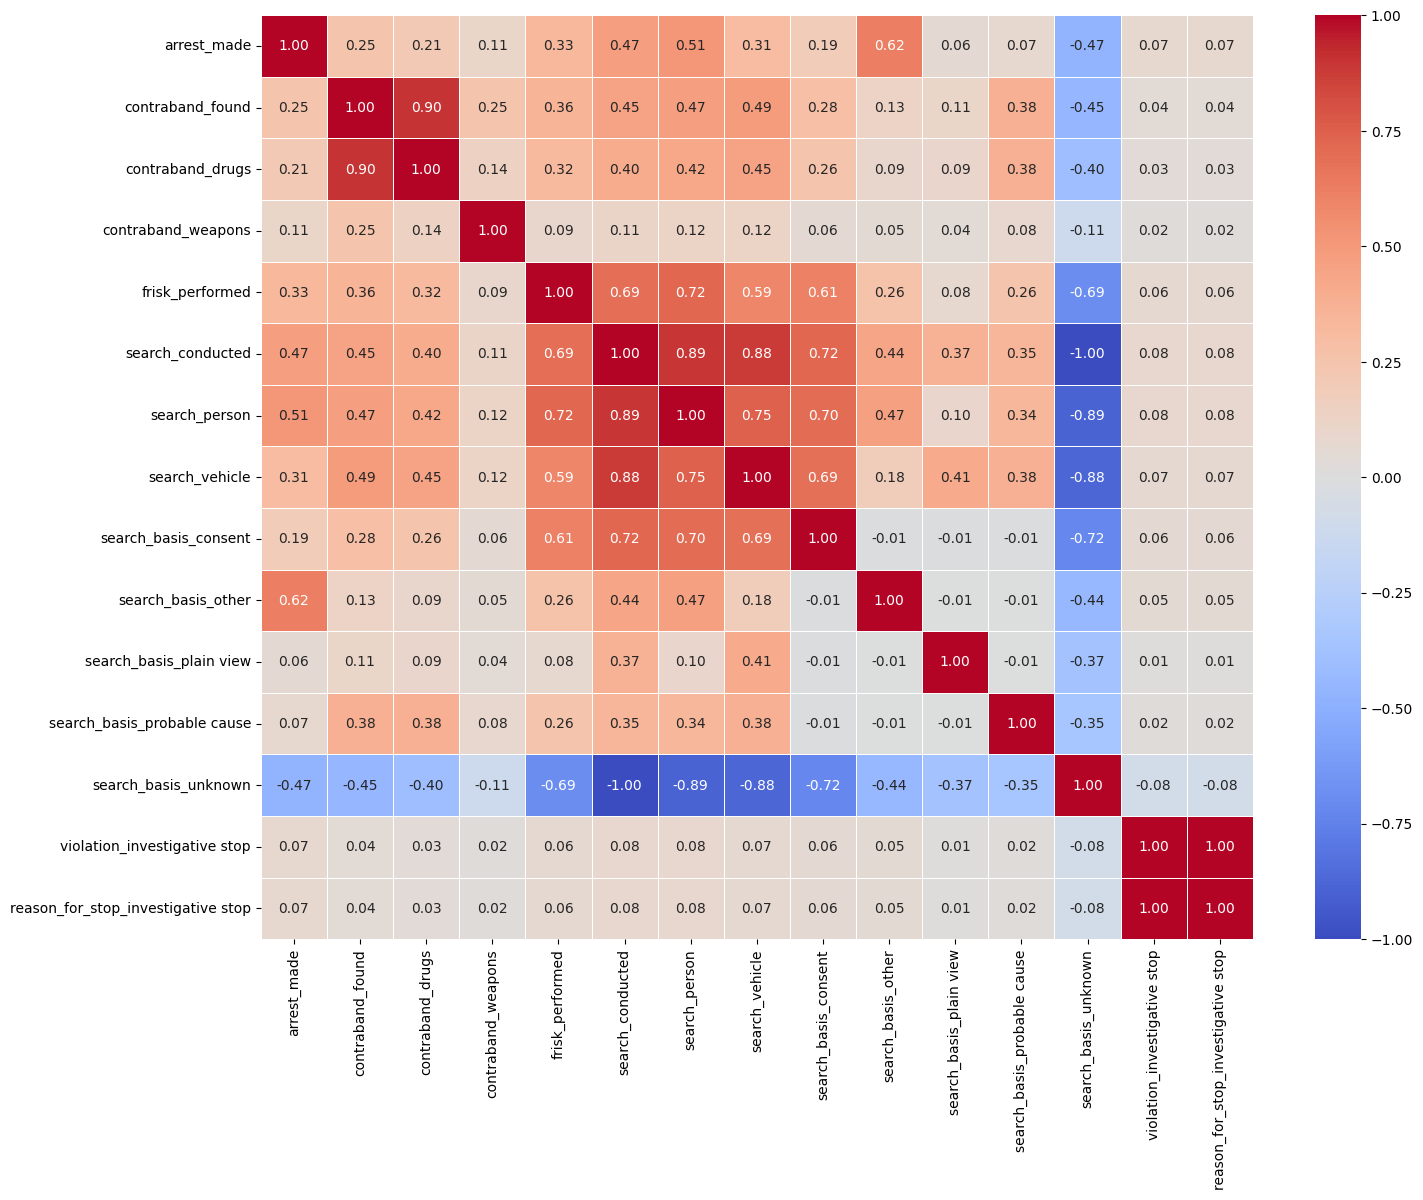

In [29]:
import matplotlib.pyplot as plt
import seaborn as sb
# Use a larger plot size.
fig, ax = plt.subplots(figsize=(16,12))

# Filter out variables with low correlation.
corr_threshold = 0.05
high_corr_vars = (data.corr().abs() > corr_threshold)['arrest_made']

# Plot the heatmap with cell value annotations and two-place precision.
sb.heatmap(data.corr().loc[high_corr_vars, high_corr_vars], ax=ax, annot=True, linewidths=0.4, cmap='coolwarm', fmt='.2f')

We can see that there are a few input features that stand out as far as being correlated in some way with arrest_made. Namely, search_basis_other, search_person, and search_conducted (of which the formter two are likely a subset) have a positive correlation, while search_basis_unknown has a similar magnitude negative correlation.

However, recall that the "unknown" value was our backfill value for NaNs in the original search_basis categorical column. Introducing that backfill value may have put too much emphasis on the search_basis. We can further see that search_basis_unknown is very strongly colinear with search_conducted, which is logical considering we backfilled "unknown" for NaNs in that column, which would naturally correspond to a False search_conducted. Considering this, we'll drop search_basis_unknown due to the high colinearity.

Another item to note is that the more strongly correlated features are all binary since they were either originally binary values or were derived from one-hot encoding.

Looking at the original search_basis breakdown, we can see that other is a relatively small subset. However, it still has a stronger correlation with arrest_made in the correlation matrix above.

In [30]:
data.drop(columns=['search_basis_unknown','search_conducted'], inplace=True)

##MODELLING AND ANALYSIS

In [32]:
# Separate target from features.
y = data.arrest_made
X = data.drop(['arrest_made'], axis=1)

In [33]:
# Split data into separate training and validation sets.
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=42)

##Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y.pred= lr_model.predict(X_valid)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid,y.pred)



0.9894599670384424

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid,y.pred)

array([[256186,    347],
       [  2403,   1974]])

In [40]:
from sklearn import metrics
print(metrics.classification_report(y_valid,y.pred))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99    256533
        True       0.85      0.45      0.59      4377

    accuracy                           0.99    260910
   macro avg       0.92      0.72      0.79    260910
weighted avg       0.99      0.99      0.99    260910



In [43]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_valid,y.pred)

0.7248205894530543

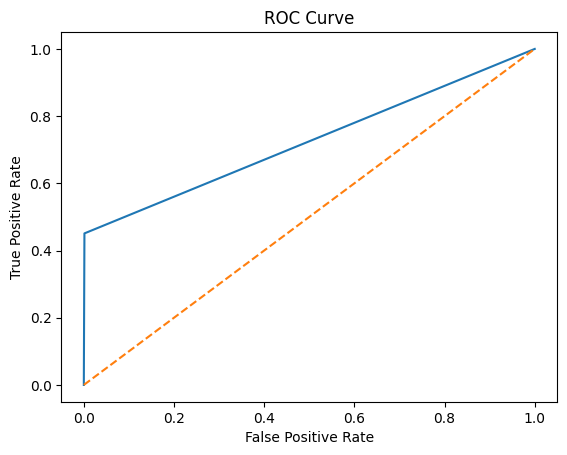

In [45]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_valid, y.pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

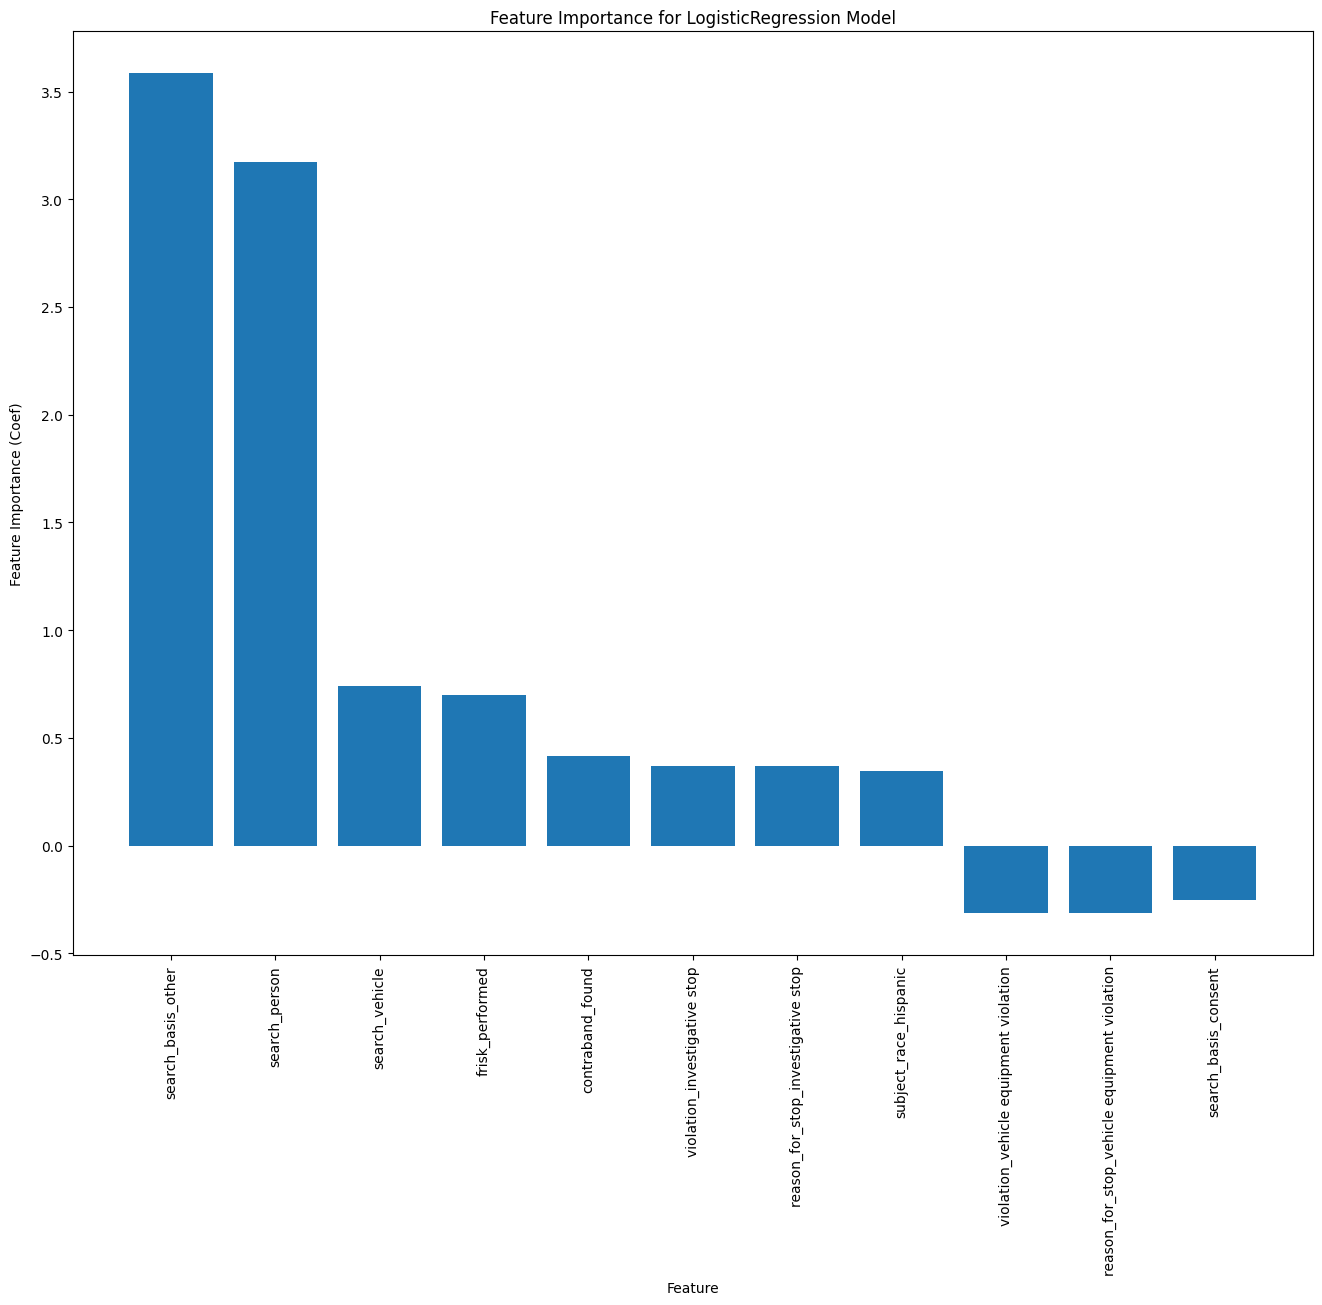

In [51]:
feature_importance=lr_model.coef_[0]
feature_names=lr_model.feature_names_in_

feature_importance_sorted = sorted(zip(feature_names, feature_importance), key=lambda x: abs(x[1]), reverse=True)
labels = []
vals = []
# Filter based on simple threshold.
for l, v in feature_importance_sorted:
    if abs(v) > 0.2:
        labels.append(l.replace('numerical__', '').replace('categorical__', ''))
        vals.append(v)

# Plot results.
plt.subplots(figsize=(16,12))
plt.bar(labels, vals)
plt.xlabel('Feature')
plt.xticks(rotation=90)
plt.ylabel('Feature Importance (Coef)')
plt.title('Feature Importance for LogisticRegression Model')
plt.show()


##Random Forest Classification

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [57]:
y_pred2 = rf_model.predict(X_valid)

In [58]:
from sklearn import metrics
print(metrics.classification_report(y_valid,y_pred2))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99    256533
        True       0.86      0.47      0.61      4377

    accuracy                           0.99    260910
   macro avg       0.92      0.74      0.80    260910
weighted avg       0.99      0.99      0.99    260910



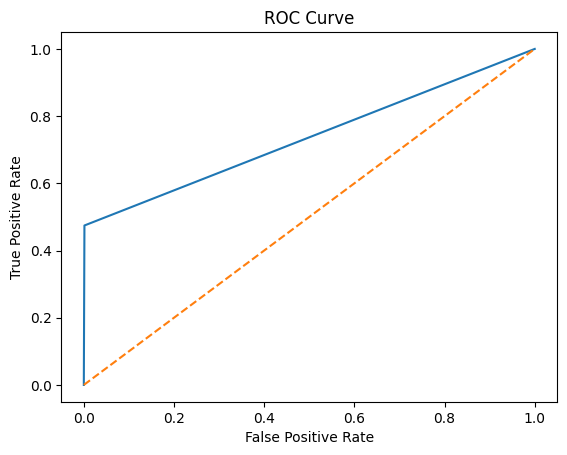

In [59]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_valid, y_pred2)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

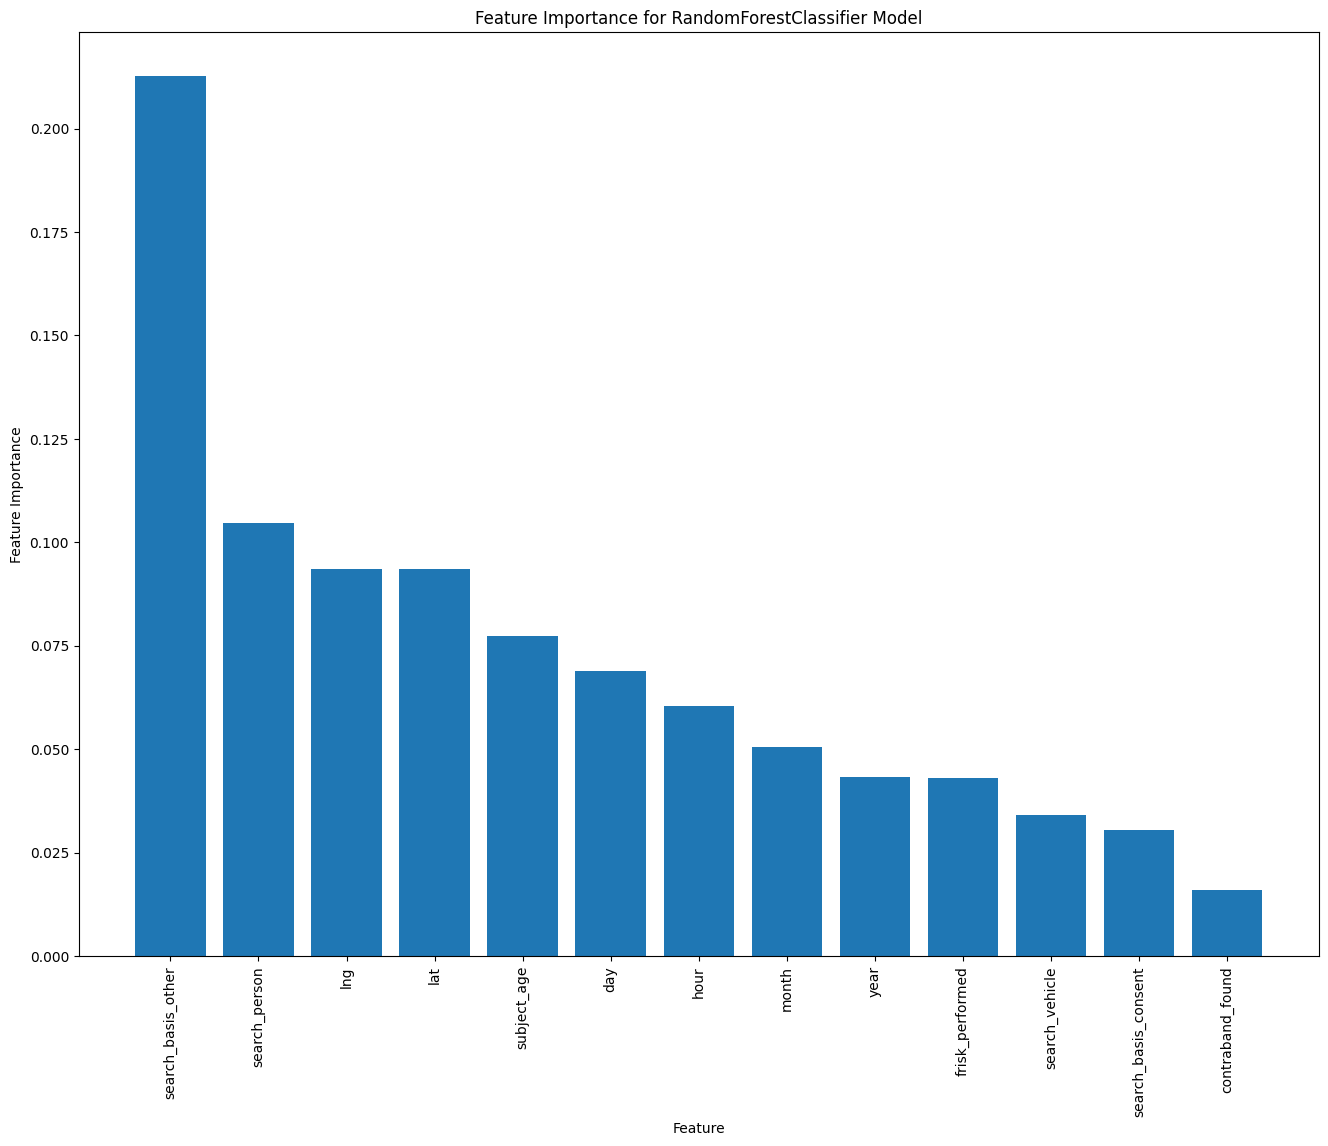

In [60]:
# Extract coefficients/importance factors and feature names.
feature_importance = rf_model.feature_importances_
feature_names = rf_model.feature_names_in_

# Join and sort feature names/coefficients by absolute value.
feature_importance_sorted = sorted(zip(feature_names, feature_importance), key=lambda x: abs(x[1]), reverse=True)
labels = []
vals = []

# Filter based on simple threshold.
for l, v in feature_importance_sorted:
    if abs(v) > 1e-2:
        labels.append(l.replace('numerical__', '').replace('categorical__', ''))
        vals.append(v)

# Plot results.
plt.subplots(figsize=(16,12))
plt.bar(labels, vals)
plt.xlabel('Feature')
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')
plt.title('Feature Importance for RandomForestClassifier Model')
plt.show()



##Conclusion and Retrospective

Based on raw model performance, the Logistic Regression and Random Forest methods performed very similar on this dataset.

Due to the relatively very small number of arrests, both models had high specificity but low sensitivity.

Both models perform equally well with perfect recall and nearly perfect precision.

The Random Forest model slightly improves recall and F1-score for the True class, with a slight trade-off in precision. This suggests that the Random Forest model has better overall handling of the minority class (True), improving its ability to identify True instances while slightly sacrificing precision.

They each demonstrated similar sensitivity and specificity as well as ROC and AUC, though the Logistic Regression had a slightly higher overall AUC around the middle of the false positive range.

Both models ended up with high feature importance for the search_basis_other feature, which matched what we originally noticed in the correlation matrix.

After search_basis_other, additional search related features showed up near the top of the list. Clearly, if a search of some kind is performed, the chances of an arrest increase.

In conclusion, the Random Forest model provides a slight edge in handling the True class, balancing precision and recall more effectively, while maintaining strong performance on the False class.



